# Exercise 2

Anda sebagai data analyst / scientist, diberikan sebuah file.

Berikut package installation dan import.

In [1]:
import sys

#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install -U matplotlib
#!{sys.executable} -m pip install seaborn

import math
from collections import defaultdict

import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

Load mtcars.csv dataset.

Berikut dokumentasi mtcars dataset (source: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars): 

32 samples, 11 columns

| Variable | Explanation |
| --- | --- |
| mpg | Miles/(US) gallon |
| cyl | Number of cylinders |
| disp | Displacement (cu.in.) |
| hp | Gross horsepower |
| drat | Rear axle ratio |
| wt | Weight (1000 lbs) |
| qsec | 1/4 mile time |
| vs | Engine (0 = V-shaped, 1 = straight) |
| am | Transmission (0 = automatic, 1 = manual) |
| gear | Number of forward gears |
| carb | Number of carburetors |

In [2]:
# Load dataset (first column as index).
df = pd.read_csv("data/mtcars.csv", index_col=0)

# Print dataset.
print(df)

                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280C            17.8    6  167.6  123  3.92  3.440  18.90   1   0     4   
Merc 450SE           16.4    8  275.8  1

## Part A & B

Tulis program python untuk melakukan analisa deskripsi statistic dan exploratory data atas data tersebut. Tampilkan hasilnya.

Insight-insight apa yang dapat anda simpulkan dari data tersebut.

Untuk progresi yang lebih natural, Part A and B (juga C) akan dibahas saat bersamaan.

In [3]:
# Print information.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB
None


From the information table we can observe that the number of samples are 32. This sample size is relatively small for statistical analysis and inference. All columns are also in the types of float or integers; however, we know from the documentations and the dataset that some columns are categorical. Therefore, we need to separate them and analyse them accordingly.

In [4]:
# Categorical columns.
categorical_columns = [
    "cyl",
    "vs",
    "am",
    "gear",
    "carb"
]
# Numerical columns.
numerical_columns = [col for col in df.columns if col not in categorical_columns]

We are going to do exploratory data analysis. These are some of the functions and objects to help with the plotting.

In [5]:
# Create subplots.
def create_subplots(
        columns: list
):
    # Calculate the data.
    nrow = len(columns) / 2
    
    # Set the subplots.
    fig, axs = plt.subplots(math.ceil(nrow), 2, figsize=(10, 8))

    # Disable last plot.
    if not nrow.is_integer():
        fig.delaxes(axs[int(nrow), 1])
    
    return fig, axs


# Plot counter.
class PlotCounter():
    def __init__(self) -> None:
        # Run reset.
        self.reset()
    
    def reset(self) -> None:
        """
        Reset counter.
        """
        self.c_row = 0
        self.c_column = 0

    def update(self) -> None:
        """
        Update counter.
        """
        if self.c_column == 0:
            self.c_column += 1
        else:
            self.c_column = 0
            self.c_row += 1

# Counter.
p_counter = PlotCounter()

Firstly, we are going to deal with the numerical columns. We are going to plot the distribution of each column with density plots, alongside some statistical inference.

             mpg        disp          hp       drat         wt       qsec
count  32.000000   32.000000   32.000000  32.000000  32.000000  32.000000
mean   20.090625  230.721875  146.687500   3.596563   3.217250  17.848750
std     6.026948  123.938694   68.562868   0.534679   0.978457   1.786943
min    10.400000   71.100000   52.000000   2.760000   1.513000  14.500000
25%    15.425000  120.825000   96.500000   3.080000   2.581250  16.892500
50%    19.200000  196.300000  123.000000   3.695000   3.325000  17.710000
75%    22.800000  326.000000  180.000000   3.920000   3.610000  18.900000
max    33.900000  472.000000  335.000000   4.930000   5.424000  22.900000


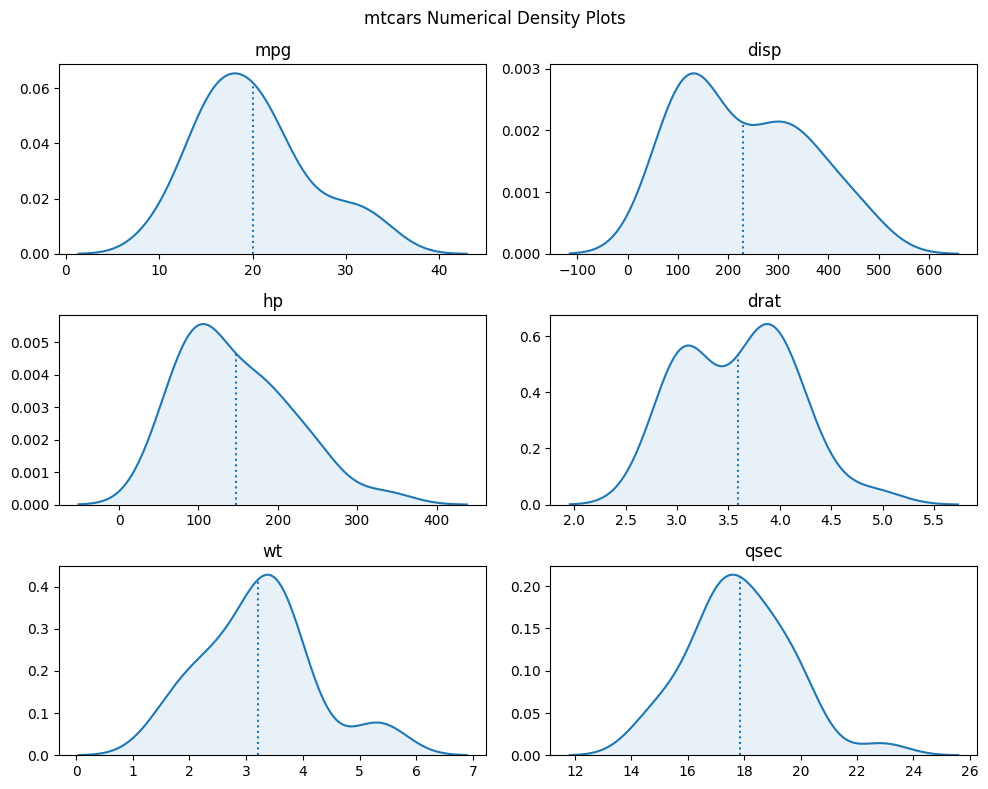

In [6]:
# Numerical dataset.

# Statistical analysis.
print(df[numerical_columns].describe())

# Set the subplots.
fig, axs = create_subplots(numerical_columns)

# Set title.
plt.suptitle("mtcars Numerical Density Plots")

# Reset counter.
p_counter.reset()

# Loop through the columns.
for col in numerical_columns:
    # Plot the column.
    ax = sns.kdeplot(
        data=df,
        x=col,
        ax=axs[p_counter.c_row, p_counter.c_column],
    )

    # Get x and y samples from the line.
    line = ax.lines[0]
    x_data = line.get_xdata()
    y_data = line.get_ydata()

    # Mean line.
    c_mean = np.mean(df[col])
    ax.vlines(
        x=c_mean,
        ymin=0,
        ymax=np.interp(
            x=c_mean,
            xp=x_data,
            fp=y_data
        ),
        ls=':'
    )

    # Fill density plot.
    ax.fill_between(
        x=x_data,
        y1=0,
        y2=y_data,
        alpha=0.1
    )

    # Set title and disable labels.
    ax.set_title(col)
    ax.set(xlabel=None, ylabel=None)

    # Update counter.
    p_counter.update()


# Show plots.
plt.tight_layout()
plt.show()

Columns "disp" and "drat" have bimodal distribution, while the other columns are in skewed distribution to the right. Since the columns have different units, the range of values are varied. If we are going to do regression analysis or modelling, we need to either scale or normalise them.

Next, we are going to plot some countplots for the categorical data.

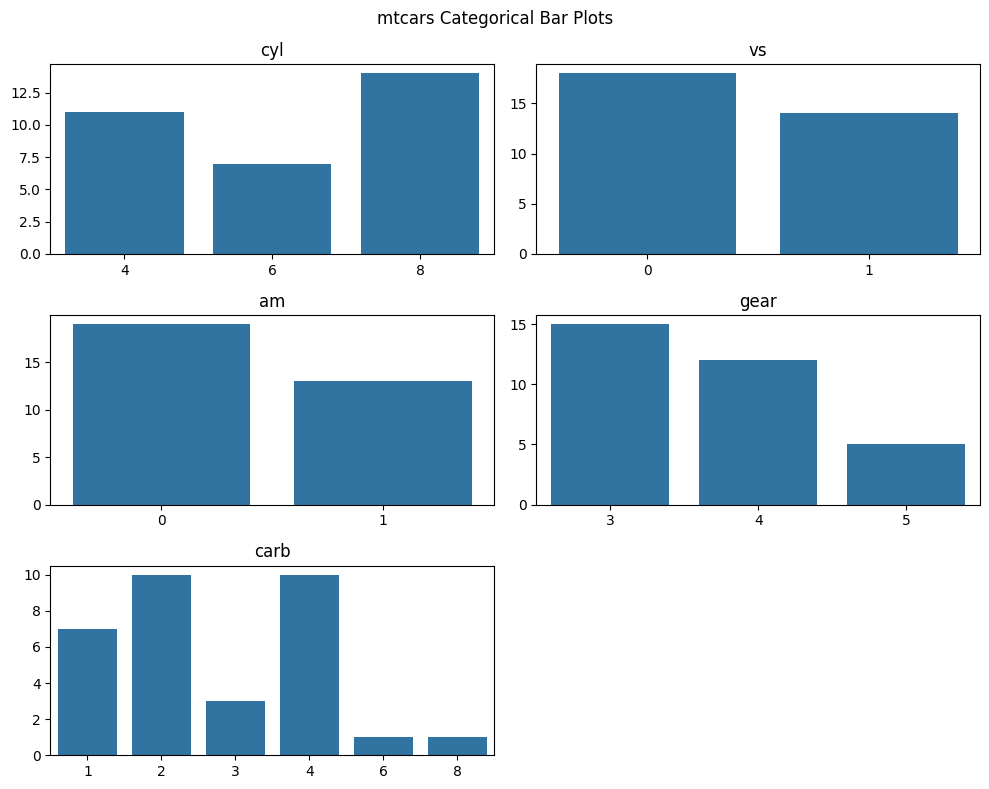

In [7]:
# Categorical data.

# Set the subplots.
fig, axs = create_subplots(categorical_columns)

# Set title.
plt.suptitle("mtcars Categorical Bar Plots")

# Reset counter.
p_counter.reset()

# Loop through the columns.
for col in categorical_columns:
    # Plot the column.
    ax = sns.countplot(
        data=df,
        x=col,
        ax=axs[p_counter.c_row, p_counter.c_column],
    )

    # Set title and disable labels.
    ax.set_title(col)
    ax.set(xlabel=None, ylabel=None)

    # Update the subplot counters.
    p_counter.update()

plt.tight_layout()
plt.show()

Immediately we can see that the "carb" ratio does not reflect a good representations, as 6 and 8 only have one sample.

Since we have 11 columns, we are going to focus on the "mpg" column as this variable is the most popular used as dependent variable, or target variable. Given this dataset, we should be able to estimate the fuel given the information from the other specification of the car such as the transmission, number of cylinder, the horsepower, and the other variables.

Next, we are going to plot the boxplot of "mpg", given each of the categorical data.

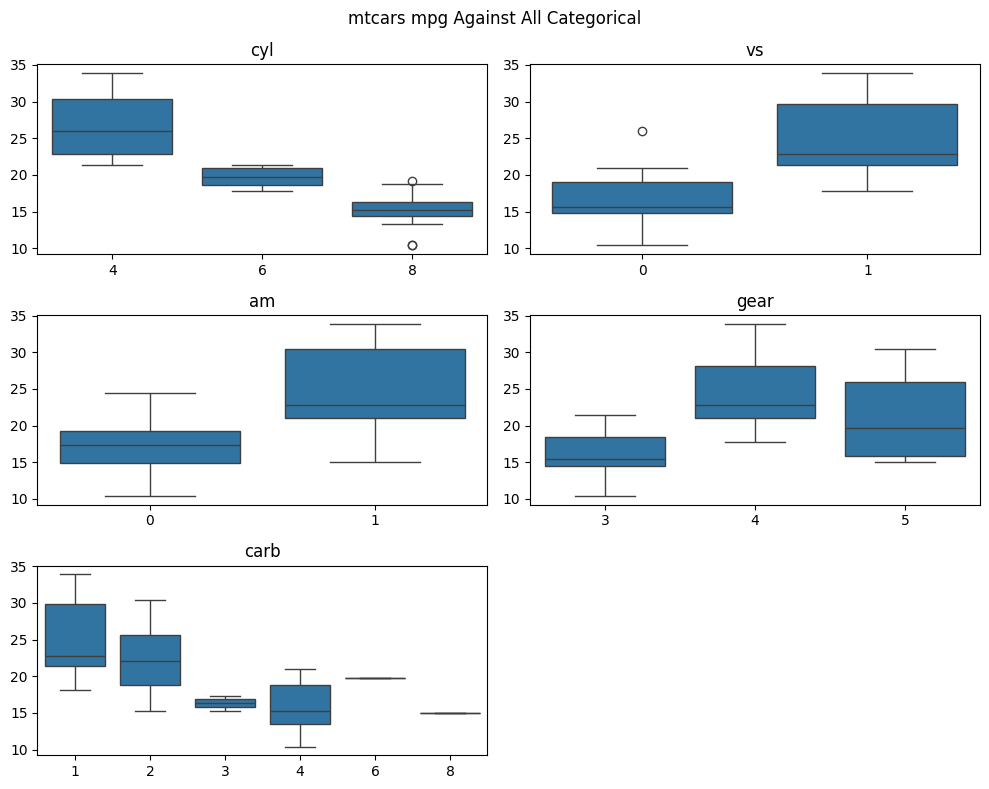

In [8]:
# All categorical against mpg.

# Set the subplots.
fig, axs = create_subplots(categorical_columns)

# Set title.
plt.suptitle("mtcars mpg Against All Categorical")

# Reset counter.
p_counter.reset()

# Loop through the columns.
for col in categorical_columns:
    # Plot the column.
    ax = sns.boxplot(
        data=df,
        x=col,
        y="mpg",
        ax=axs[p_counter.c_row, p_counter.c_column],
    )

    # Set title and disable labels.
    ax.set_title(col)
    ax.set(xlabel=None, ylabel=None)

    # Update the subplot counters.
    p_counter.update()

plt.tight_layout()
plt.show()

From the "cyl" boxplot, we can see that as a car has more cylinder, the consumed fuel will increase. Cars with v-shaped engine are less efficient than cars with straight-shaped engine. Lastly, automatic cars consume more fuel than their manual counterparts.

The number of forward gears have a mixed relation to fuel consumption. Generally, cars with 3 forward gears are the least efficient, and cars with 4 and 5 gears are more efficient with little differences. There is a trend that cars will be less efficient as the number of carburetors increase, but with the limited data from 3 to 8 number of carburetors sample it is hard to determine the truth.

We are going to plot scatterplots of the numerical data and "mpg" as the response variable. A linear regression line will guide the linear trend, although some of the variable (such as "hp") have logarithmic trend instead of linear.

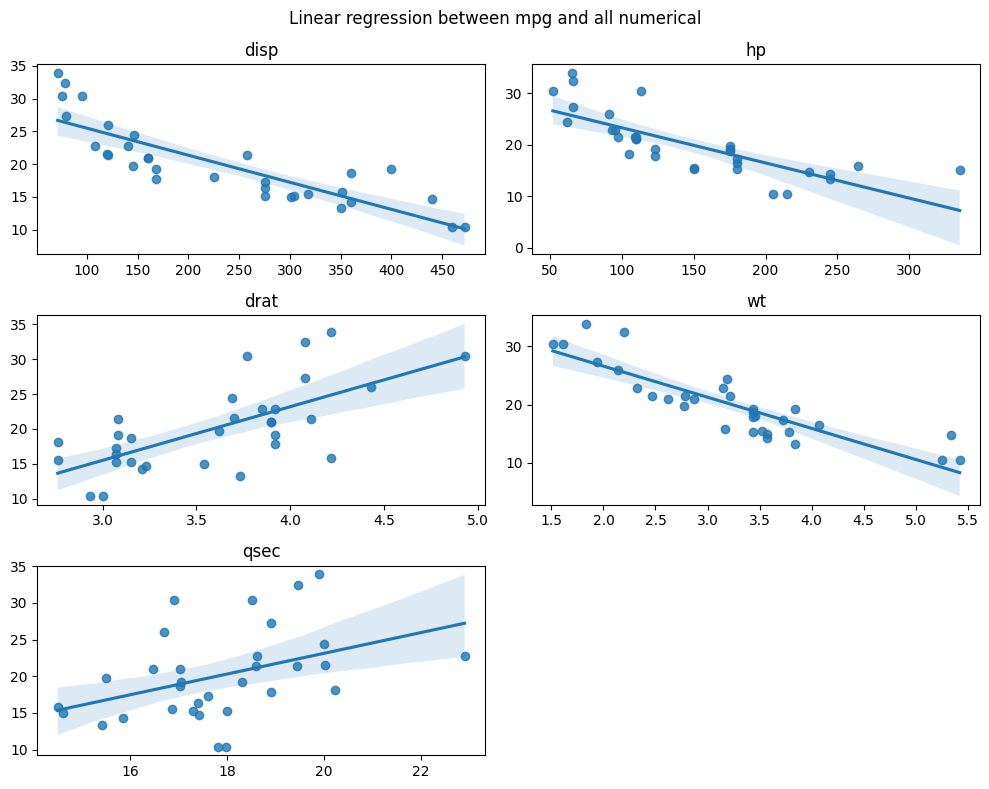

In [9]:
# All numerical against mpg.

# Numerical data except mpg.
numerical_columns_mpg = [col for col in numerical_columns if col != "mpg"]

# Set the subplots.
fig, axs = create_subplots(numerical_columns_mpg)

# Set title.
plt.suptitle("Linear regression between mpg and all numerical")

# Reset counter.
p_counter.reset()

# Loop through the columns.
for col in numerical_columns_mpg:
    # Plot the column.
    ax = sns.regplot(
        data=df,
        x=col,
        y="mpg",
        ax=axs[p_counter.c_row, p_counter.c_column],
    )

    # Set title and disable labels.
    ax.set_title(col)
    ax.set(xlabel=None, ylabel=None)

    # Update the subplot counters.
    p_counter.update()

plt.tight_layout()
plt.show()

From the scatterplots, we can infer that "disp", "hp", and "wt" have a strong negative correlations to "mpg", while "drat" and "qsec" have weaker positive correlations. These are expected since the displacement size will affect the weight directly, and heavier objects will require more force to accelerate. The horsepower is important as well, because the fuel consumption will be less efficient to get the best acceleration performance. The rear axle ratio and the quarter mile time are positively affecting the fuel consumption subtly.

We are going to analyse the relation between "hp" and "mpg", as well as "disp" and "mpg" with respect to the categorical variables.

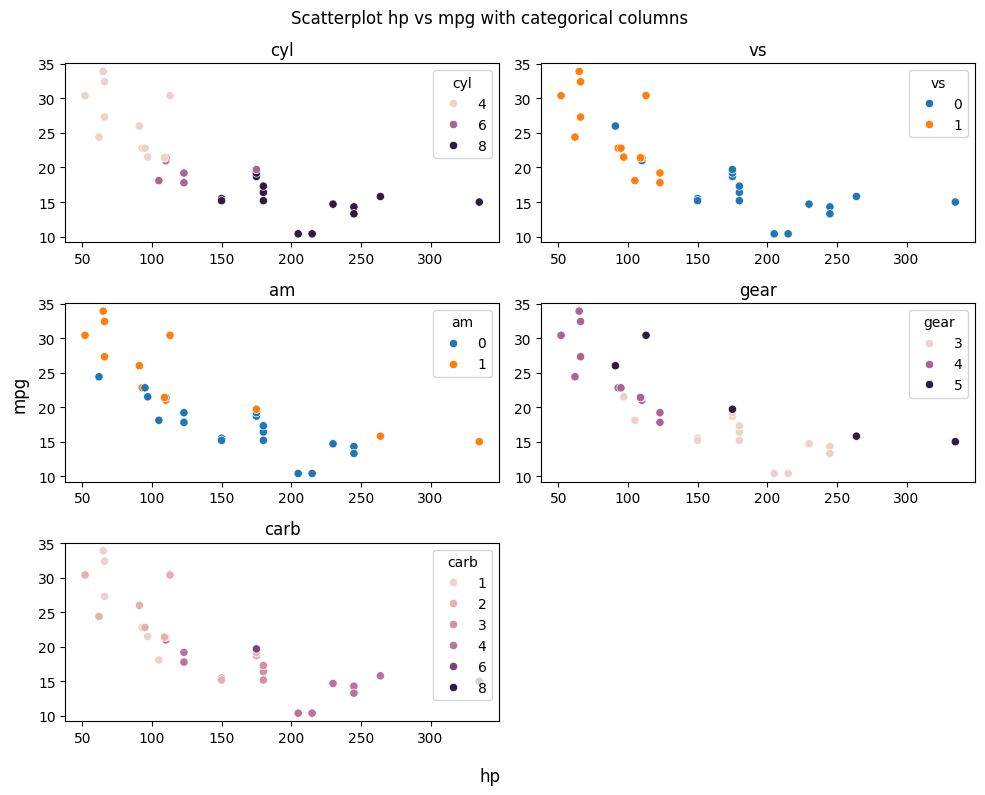

In [10]:
# mpg and hp with all categorical data.

# Set the subplots.
fig, axs = create_subplots(categorical_columns)

# Set title.
plt.suptitle("Scatterplot hp vs mpg with categorical columns")

# Axis labels.
fig.supxlabel("hp")
fig.supylabel("mpg")

# Reset counter.
p_counter.reset()

# Loop through the columns.
for col in categorical_columns:
    # Plot the column.
    ax = sns.scatterplot(
        data=df,
        x="hp",
        y="mpg",
        hue=col,
        ax=axs[p_counter.c_row, p_counter.c_column],
    )

    # Set title and disable labels.
    ax.set_title(col)
    ax.set(xlabel=None, ylabel=None)

    # Update the subplot counters.
    p_counter.update()

plt.tight_layout()
plt.show()

Both number of cylinder and the engine type has a high correlation to the horsepower, and as from those scatterplot we can see how "cyl", "vs" and "hp" are affecting the fuel efficiency. As for the number of gears, we can see a discriminative differences between cars with 3 and 4 forward gear, but cars with 5 forward gear are more scattered. The transmission and number of carburetors are mixed for the two variables.

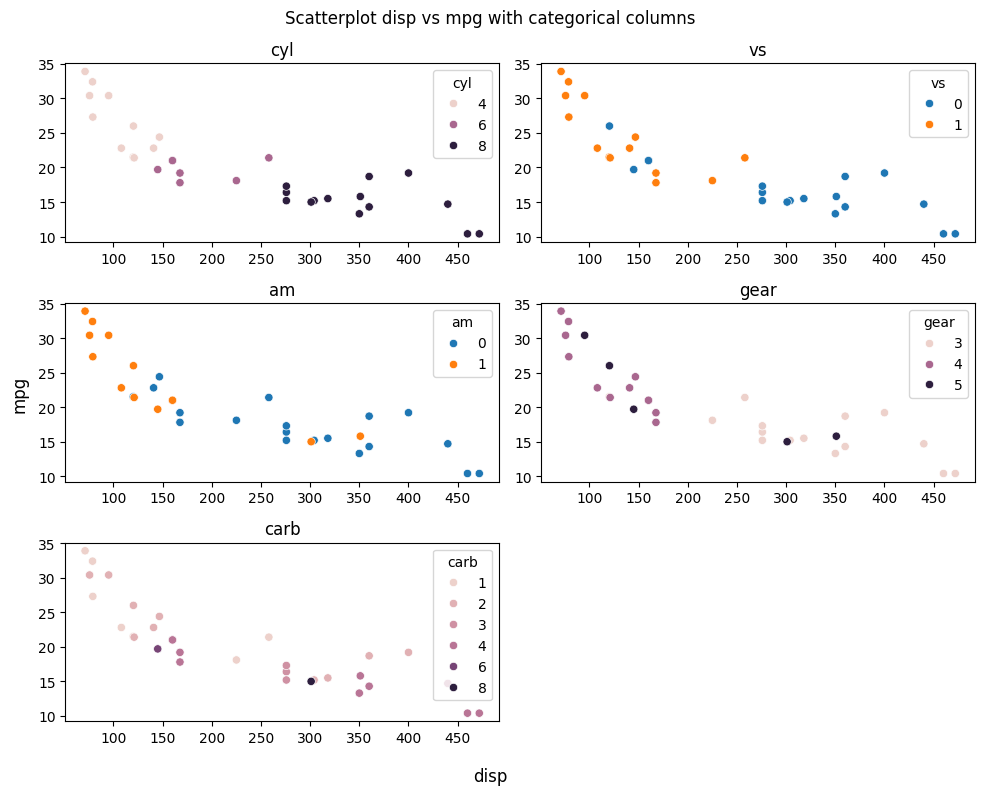

In [11]:
# mpg and hp with all categorical data.

# Set the subplots.
fig, axs = create_subplots(categorical_columns)

# Set title.
plt.suptitle("Scatterplot disp vs mpg with categorical columns")

# Axis labels.
fig.supxlabel("disp")
fig.supylabel("mpg")

# Reset counter.
p_counter.reset()

# Loop through the columns.
for col in categorical_columns:
    # Plot the column.
    ax = sns.scatterplot(
        data=df,
        x="disp",
        y="mpg",
        hue=col,
        ax=axs[p_counter.c_row, p_counter.c_column],
    )

    # Set title and disable labels.
    ax.set_title(col)
    ax.set(xlabel=None, ylabel=None)

    # Update the subplot counters.
    p_counter.update()

plt.tight_layout()
plt.show()

As for the displacement trend, we can see that "cyl", "vs", and "am" column have a clear discriminative line in between the categories. Most manual transmission car have low displacement and high miles per gallon, except of two outliers. Same observation for the engine type, with v-shaped engine usually have high displacement and low miles per gallon, with 3 outliers. The discriminative line between 3 and 4 forward gears are more defined, but cars with 5 gears are still scattered.

## Part C (and B)

As mentioned before, the small dataset will impact the correlation analysis since we do not know what the population distribution. Because of the distribution of "mpg" suggest that this variable might be normal distribution with the central limit theorem, we are going to use Pearson's correlation. However, to address the possibility of non-parametric relationships, we are going to include Spearman's correlation as well.

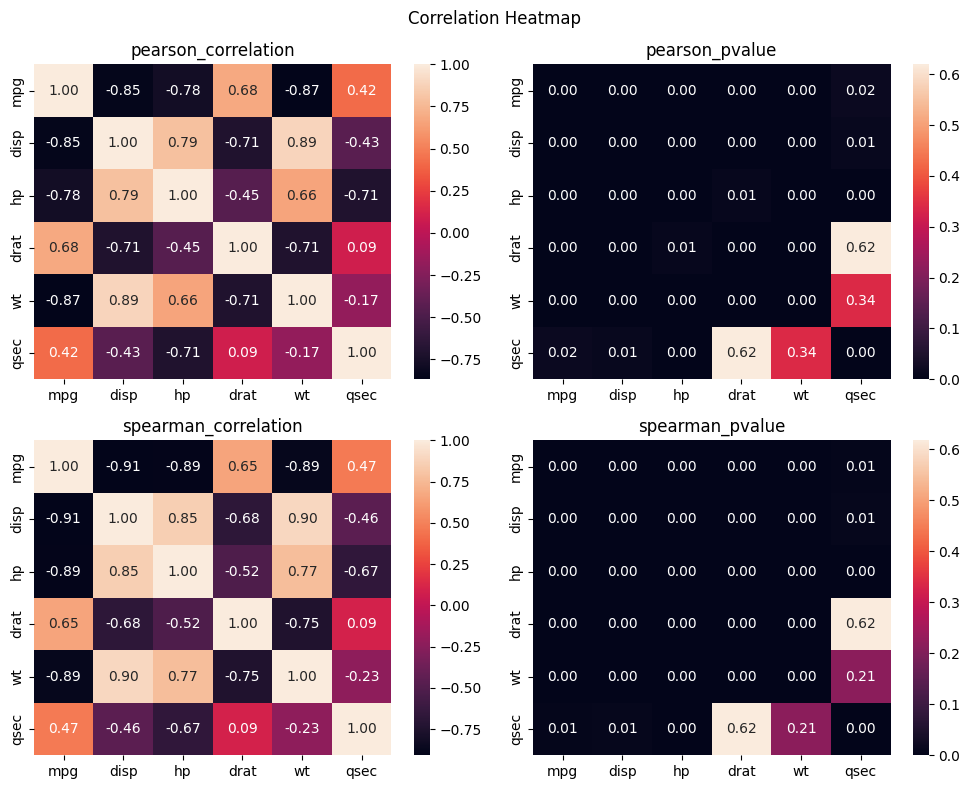

In [12]:
# Arrays.
pearson_map_stats = np.empty((len(numerical_columns), len(numerical_columns)))
pearson_map_pvalue = np.empty((len(numerical_columns), len(numerical_columns)))
spearman_map_stats = np.empty((len(numerical_columns), len(numerical_columns)))
spearman_map_pvalue = np.empty((len(numerical_columns), len(numerical_columns)))

# Calculate correlation.
for i, col_x in enumerate(numerical_columns):
    for j, col_y in enumerate(numerical_columns):
        pearson_map_stats[i, j], pearson_map_pvalue[i, j] = stats.pearsonr(
            x=df[col_x].to_numpy(),
            y=df[col_y].to_numpy()
        )
        spearman_map_stats[i, j], spearman_map_pvalue[i, j] = stats.spearmanr(
            a=df[col_x].to_numpy(),
            b=df[col_y].to_numpy()
        )

# Create subplots.
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Lists for loop.
data_list = (pearson_map_stats, pearson_map_pvalue, spearman_map_stats, spearman_map_pvalue)
titles = ("pearson_correlation", "pearson_pvalue", "spearman_correlation", "spearman_pvalue")

# Reset counter.
p_counter.reset()

for d, title in zip(data_list, titles):
    ax = sns.heatmap(
        data=d,
        annot=True,
        fmt=".2f",
        xticklabels=numerical_columns,
        yticklabels=numerical_columns,
        ax=axs[p_counter.c_row, p_counter.c_column]
    )

    ax.set_title(title)

    p_counter.update()

plt.suptitle("Correlation Heatmap")

plt.tight_layout()
plt.show()

Both correlation are between -1 and 1, where -1 shows strong negative correlation, 1 shows strong positive correlation, and 0 shows no correlation. As suspected from the previous analysis, the displacement and weight shows a strong positive correlation. For the fuel efficiency, the displacement, horsepower, and weight have crucial negative correlation. The rear axle ratio have weaker positive correlation with fuel efficiency, and the quarter mile time have even less positive correlation.
As expected, the correlation will be significant for p less than 0.05, with the exception of "drat" and "wt" to "qsec", which are not correlated with the small samples.

Below are chi-squared test between the categorical variables.

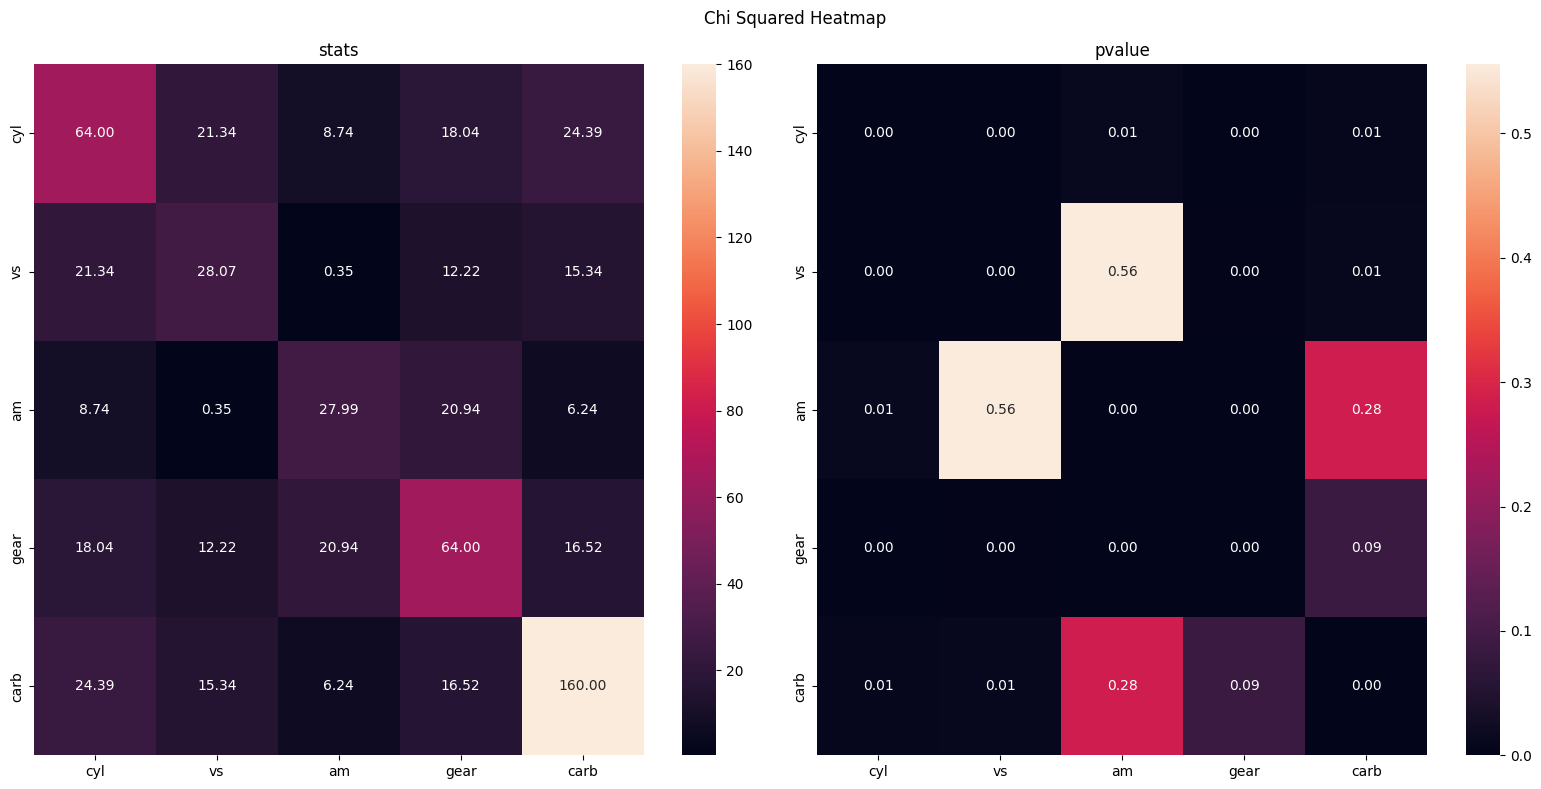

In [13]:
# Arrays
chi2_stats = np.empty((len(categorical_columns), len(categorical_columns)))
chi2_pvalue = np.empty((len(categorical_columns), len(categorical_columns)))

for i, col_x in enumerate(categorical_columns):
    for j, col_y in enumerate(categorical_columns):
        result = stats.chi2_contingency(pd.crosstab(df[col_x], df[col_y]))
        chi2_stats[i, j] = result.statistic
        chi2_pvalue[i, j] = result.pvalue

# Create subplots.
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Lists for loop.
data_list = (chi2_stats, chi2_pvalue)
titles = ("stats", "pvalue")

for i, (d, title) in enumerate(zip(data_list, titles)):
    ax = sns.heatmap(
        data=d,
        annot=True,
        fmt=".2f",
        xticklabels=categorical_columns,
        yticklabels=categorical_columns,
        ax=axs[i]
    )

    ax.set_title(title)

    p_counter.update()

plt.suptitle("Chi Squared Heatmap")

plt.tight_layout()
plt.show()

Most null-hypothesis are rejected except for "am" and "gear" to "carb". The variables "vs" and "am" also fails to reject the null hypothesis.

Same as before, we are going to focus on all categorical variable with "mpg". We are using one-way ANOVA t-test, as well as Kruskal-Wallis H-test to test the null hypothesis.

In [14]:
# Dictionary.
data_dict = defaultdict(list)

# Get anova.
for col in categorical_columns:
    # Get the nested list.
    nested_list = [d["mpg"].tolist() for _, d in df.groupby(col)]

    # Get ANOVA.
    anova_f, anova_p = stats.f_oneway(*nested_list)
    anova_sig = True if anova_p < 0.5 else False

    # Get Kruskal Wallis.
    kruskal_f, kruskal_p = stats.kruskal(*nested_list)
    kruskal_sig = True if kruskal_p < 0.5 else False

    data_dict["anova_f"].append(anova_f)
    data_dict["anova_p"].append(anova_p)
    data_dict["anova_sig"].append(anova_sig)
    data_dict["kruskal_f"].append(kruskal_f)
    data_dict["kruskal_p"].append(kruskal_p)
    data_dict["kruskal_sig"].append(kruskal_sig)


df_ttest = pd.DataFrame(data_dict, index=categorical_columns)
print(df_ttest)

        anova_f       anova_p  anova_sig  kruskal_f  kruskal_p  kruskal_sig
cyl   39.697515  4.978919e-09       True  25.746156   0.000003         True
vs    23.662241  3.415937e-05       True  15.477650   0.000083         True
am    16.860279  2.850207e-04       True   9.791362   0.001753         True
gear  10.900720  2.948280e-04       True  14.323348   0.000776         True
carb   4.161431  6.546175e-03       True  15.941489   0.007013         True


As we can see, all categorical variables have a significant p value to reject the null hypothesis. In theory, our future model should benefit with these variables as coefficient.